In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

sns.set_style('whitegrid')

## Police forces included with dataset after processing
https://www.statista.com/statistics/877540/leading-police-forces-by-officer-numbers-in-the-uk/#:~:text=London's%20Metropolitan%20Police%20is%20by,Northern%20Ireland%20at%206.9%20thousand.


All,
Avon and Somerset,
Bedfordshire,
Cambridgeshire,
Cheshire,
Cleveland,
Cumbria,
Derbyshire,
Devon and Cornwall,
Dorset,
Durham,
Dyfed-Powys,
Essex,
Gloucestershire,
Greater Manchester,
Gwent,
Hampshire,
Hertfordshire,
Humberside,
Kent,
Lancashire,
Leicestershire,
Lincolnshire,
London, City of,
Merseyside,
Metropolitan Police,
Norfolk,
North Wales,
North Yorkshire,
Northamptonshire,
Northumbria,
Nottinghamshire,
South Wales,
South Yorkshire,
Staffordshire,
Suffolk,
Surrey,
Sussex,
Thames Valley,
Warwickshire,
West Mercia,
West Midlands,
West Yorkshire,
Wiltshire


In [34]:
arrest_data = requests.get('https://www.ethnicity-facts-figures.service.gov.uk/crime-justice-and-the-law/policing/number-of-arrests/latest/downloads/number-of-arrests.csv').content
arrest_df = pd.read_csv(io.StringIO(arrest_data.decode('utf-8')))
arrest_df = arrest_df.drop(columns=['Notes'])
arrest_df = arrest_df.dropna()
arrest_df = arrest_df[arrest_df['Age_Group'] == 'All']
arrest_df = arrest_df[arrest_df['Gender'] == 'All']

In [96]:
def get_arrest_per_pop(location, df):
  df_new = df[df['Geography'] == location]
  df_new = df_new[df_new['Rate per 1,000 population by ethnicity, gender, and PFA'] != ' N/A ']
  df_new = df_new.pivot(index='Time', columns='Ethnicity' ,values='Rate per 1,000 population by ethnicity, gender, and PFA')
  # Used when working with total value of arrests to remove commas from values above 1,000 (changes 1,000 (str) to 1000 (int))
  # df_new = df_new.convert_dtypes()
  # df_new = df_new.apply(lambda x: x.str.replace(',', ''))
  df_new = df_new.apply(lambda x: x.str.replace('-','0'))
  df_new = df_new.fillna(0) #Set NA values to 0 - we are assuming there was no recorded arrests of that ethnicity in that year. Mean could be used but that would does not seem like a valid identifier
  df_new = df_new.astype(int)
  return df_new

In [99]:
arrest_df_all = get_arrest_per_pop('All', arrest_df)
#Large forces
arrest_df_manchester = get_arrest_per_pop('Greater Manchester', arrest_df)
arrest_df_london = get_arrest_per_pop('Metropolitan Police', arrest_df)
#Medium forces
arrest_df_essex = get_arrest_per_pop('Essex', arrest_df)
arrest_df_lancashire = get_arrest_per_pop('Lancashire', arrest_df)
#Small forces
arrest_df_suffolk = get_arrest_per_pop('Suffolk', arrest_df)
arrest_df_wiltshire = get_arrest_per_pop('Wiltshire', arrest_df)

Text(0.5, 1.0, 'Total arrests')

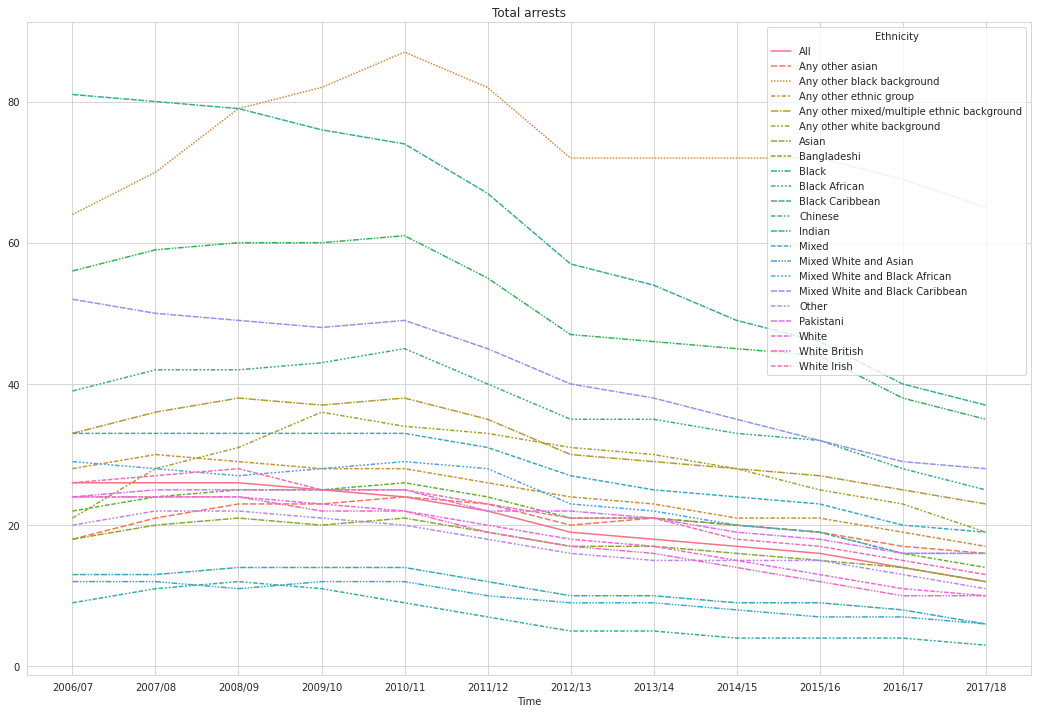

In [123]:
fig, ax = plt.subplots(figsize=(18,12), sharey='all')
sns.lineplot(data=arrest_df_all)
ax.set_title('Total arrests')

Text(0.5, 1.0, 'Wiltshire Arrests')

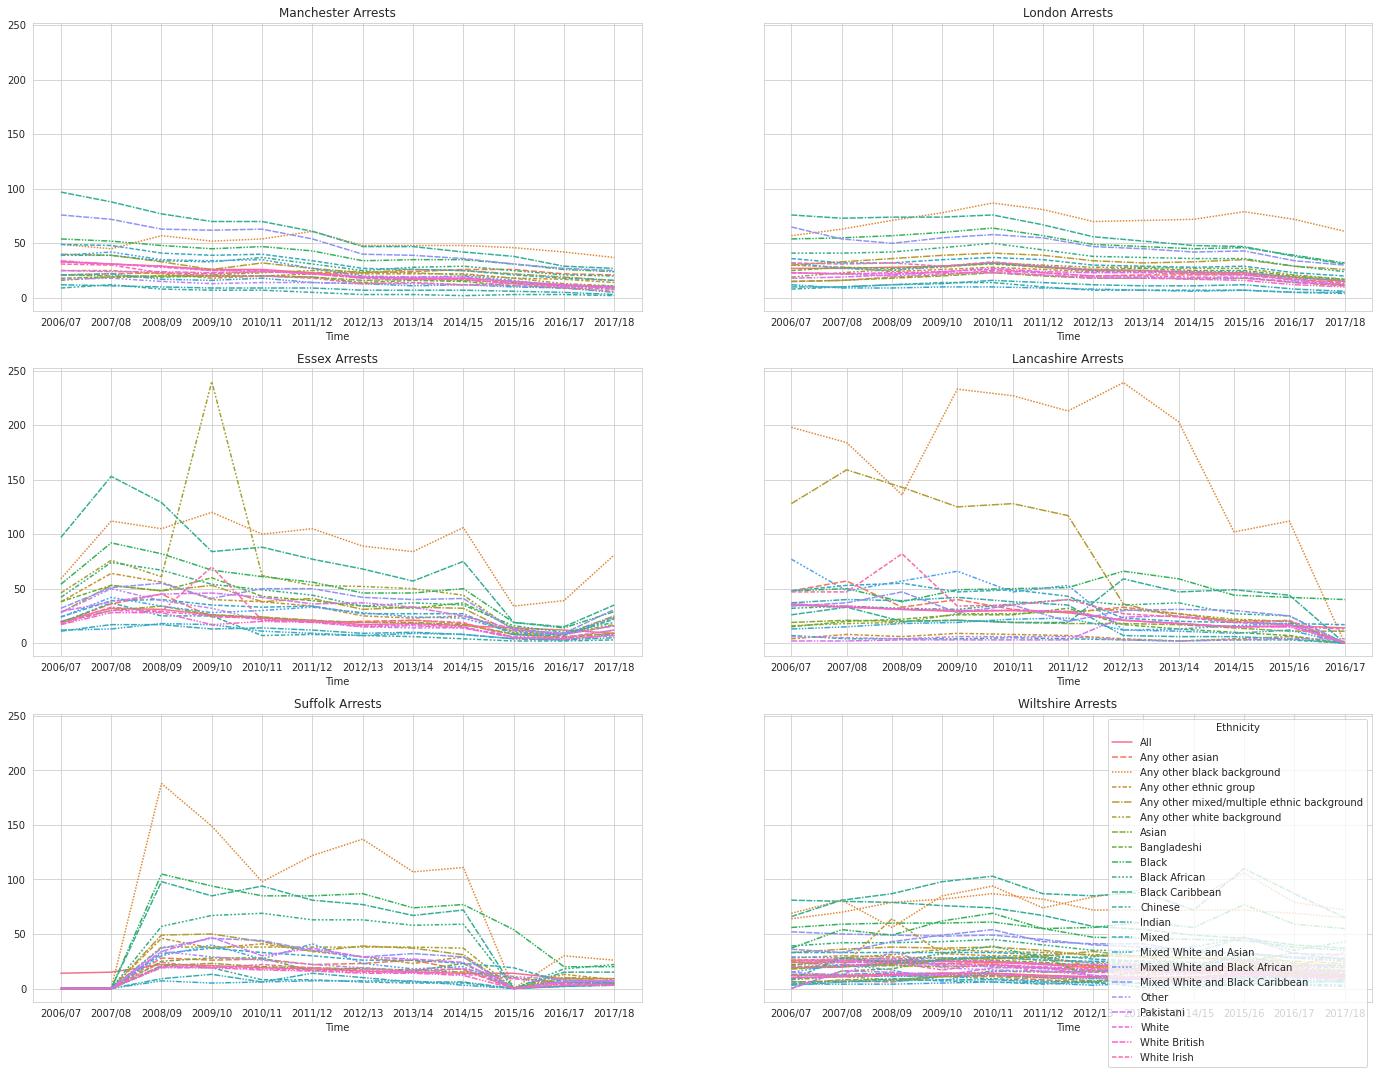

In [116]:
fig, ax = plt.subplots(3,2, figsize=(24,18), sharey='all')
sns.lineplot(data=arrest_df_manchester, ax=ax[0,0], legend=False)
sns.lineplot(data=arrest_df_london, ax=ax[0,1], legend=False)
sns.lineplot(data=arrest_df_essex, ax=ax[1,0], legend=False)
sns.lineplot(data=arrest_df_lancashire, ax=ax[1,1], legend=False)
sns.lineplot(data=arrest_df_suffolk, ax=ax[2,0], legend=False)
sns.lineplot(data=arrest_df_wiltshire, ax=ax[2,1], legend=False)
ax[0,0].set_title('Manchester Arrests')
ax[0,1].set_title('London Arrests')
ax[1,0].set_title('Essex Arrests')
ax[1,1].set_title('Lancashire Arrests')
ax[2,0].set_title('Suffolk Arrests')
ax[2,1].set_title('Wiltshire Arrests')


Arrests in the UK by ethnicity by area across uk (city(urban area), small town/village(rural b area)) 


get arrest data on a mix of different places from each category from different regions in the uk over a set period




How can you remove ai bias from an algorithm which is designed to find social bias?


Filter arrest data by all age, all genders

Unable to use london as an area of measurement due to there being alot of missing data in the dataset. I would merge this with another dataset to find the population per ethnicity of london but an dataset like this does not exist.
